In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Reading and viewing data

In [3]:
sales_df = pd.read_csv("sales_data_sample.csv", index_col="ORDERNUMBER",  encoding= 'unicode_escape')

In [22]:
sales_df.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,
10107,30,95.70,2871.00,2/24/2003,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,USA,Yu,Kwai,Small
10121,34,81.35,2765.90,5/7/2003,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,France,Henriot,Paul,Small
10134,41,94.74,3884.34,7/1/2003,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,France,Da Cunha,Daniel,Medium
10145,45,83.26,3746.70,8/25/2003,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,USA,Young,Julie,Medium
10159,49,100.00,5205.27,10/10/2003,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,USA,Brown,Julie,Medium


In [23]:
#number of columns
sales_df.shape[1]

17

In [24]:
#names of columns
sales_df.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE', 'STATUS',
       'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE',
       'CUSTOMERNAME', 'ADDRESSLINE1', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [25]:
#number of rows
sales_df.shape[0]

2823

In [26]:
#datatypes
sales_df.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
ADDRESSLINE1         object
COUNTRY              object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

# Data Cleaning

In [5]:
#dropped duplicate data
sales_df.drop_duplicates(inplace=True)

In [4]:
#created function to separate categorical and numerical data
def get_dtype_columns(df, type_):
    if type_ == 'numeric':
        return df.select_dtypes(include=[np.number]).columns.values
    else:
        return df.select_dtypes(exclude=[np.number]).columns.values

In [6]:
numeric_cols = get_dtype_columns(sales_df, 'numeric')

In [7]:
nonnumeric_cols = get_dtype_columns(sales_df, 'non-numeric')

In [31]:
#identified columns containing missing data by percent
for col in sales_df.columns:
    percentage_of_missing = np.mean(sales_df[col].isnull())
    print('{} - {}%'.format(col, round(percentage_of_missing*100)))

QUANTITYORDERED - 0%
PRICEEACH - 0%
SALES - 0%
ORDERDATE - 0%
STATUS - 0%
QTR_ID - 0%
MONTH_ID - 0%
YEAR_ID - 0%
PRODUCTLINE - 0%
MSRP - 0%
PRODUCTCODE - 0%
CUSTOMERNAME - 0%
ADDRESSLINE1 - 0%
COUNTRY - 0%
CONTACTLASTNAME - 0%
CONTACTFIRSTNAME - 0%
DEALSIZE - 0%


In [8]:
#filled missing numerical data with median of column
for col in numeric_cols:
    sales_df[col].fillna(sales_df[col].median())

In [9]:
#filled missing categorical data with '_NA_'
for col in nonnumeric_cols:
    sales_df[col].fillna('_NA_')

In [10]:
#created an outlier threshold 3 standard deviations away from the mean
#dropped outlier data
for col in numeric_cols:
    outlier_threshold1 = sales_df[col].mean() + sales_df[col].std() * 3
    outlier_threshold2 = sales_df[col].mean() - sales_df[col].std() * 3
    sales_df.drop(sales_df[sales_df[col] > outlier_threshold1].index, inplace = True)
    sales_df.drop(sales_df[sales_df[col] < outlier_threshold2].index, inplace = True)

# Descriptive Statistics

In [37]:
sales_df.describe()

,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2383.000000,2380.00000,2378.000000,2383.000000,2383.000000,2383.000000,2383.000000
mean,34.653378,83.59484,3460.094298,2.732270,7.167436,2003.755770,100.070499
std,9.069600,20.04133,1661.724477,1.217902,3.685939,0.671433,39.366020
min,6.000000,27.22000,482.130000,1.000000,1.000000,2003.000000,33.000000
25%,27.000000,69.10000,2203.837500,2.000000,4.000000,2003.000000,68.000000
50%,34.000000,94.66500,3164.025000,3.000000,8.000000,2004.000000,97.000000
75%,42.000000,100.00000,4403.640000,4.000000,11.000000,2004.000000,124.000000
max,61.000000,100.00000,8844.120000,4.000000,12.000000,2005.000000,214.000000


In [49]:
#calculated iqr for numeric columns
for col in numeric_cols:
    q3, q1 = np.percentile(sales_df[col], [75,25])
    iqr = q3 - q1
    print('{} - {}'.format(col, iqr))

QUANTITYORDERED - 15.0
PRICEEACH - nan
SALES - nan
QTR_ID - 2.0
MONTH_ID - 7.0
YEAR_ID - 1.0
MSRP - 56.0


In [50]:
#calculated mode for non-numeric columns
for col in nonnumeric_cols:
    mode = sales_df.mode()[col][0]
    print('{} - {}'.format(col, mode))

ORDERDATE - 11/14/2003
STATUS - Shipped
PRODUCTLINE - Classic Cars
PRODUCTCODE - S18_3232
CUSTOMERNAME - Euro Shopping Channel
ADDRESSLINE1 - C/ Moralzarzal, 86
COUNTRY - USA
CONTACTLASTNAME - Freyre
CONTACTFIRSTNAME - Diego
DEALSIZE - Medium


In [51]:
#calculated number of unique values for non-numeric columns
for col in nonnumeric_cols:
    unique = sales_df.nunique()[col]
    print('{} - {}'.format(col, unique))

ORDERDATE - 224
STATUS - 6
PRODUCTLINE - 7
PRODUCTCODE - 109
CUSTOMERNAME - 92
ADDRESSLINE1 - 92
COUNTRY - 19
CONTACTLASTNAME - 77
CONTACTFIRSTNAME - 72
DEALSIZE - 3


# Data Visualization

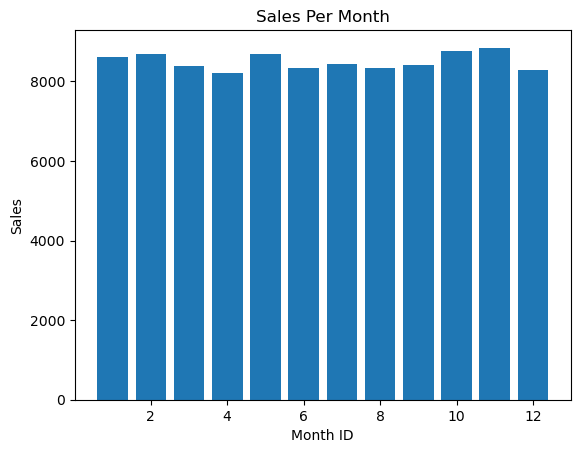

In [65]:
plt.bar(sales_df['MONTH_ID'], sales_df['SALES'])
plt.title('Sales Per Month')
plt.xlabel('Month ID')
plt.ylabel('Sales')
plt.show()

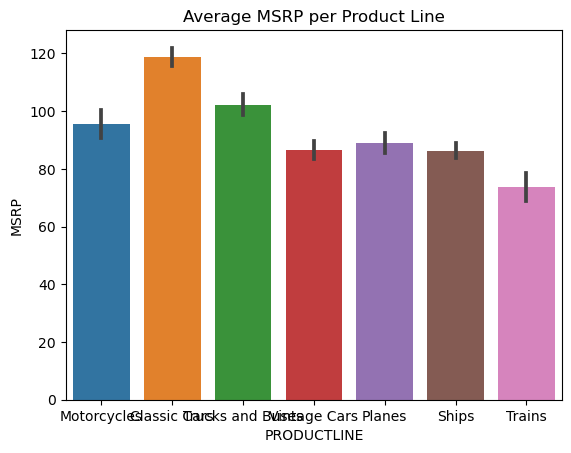

In [76]:
sns.barplot(x='PRODUCTLINE', y='MSRP', data=sales_df).set(title='Average MSRP per Product Line');

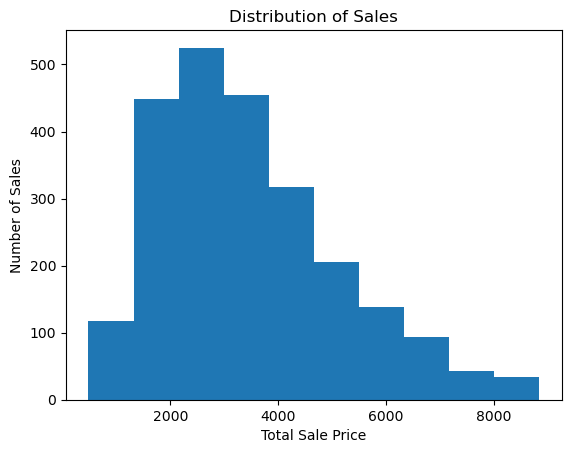

In [78]:
plt.title("Distribution of Sales")
plt.xlabel("Total Sale Price")
plt.ylabel("Number of Sales")
plt.hist(sales_df['SALES']);

# Data Insights

Studying the descriptive statistics for your dataset helps you get an idea of how the data is laid out and what data you have available. 
Looking at the first graph, we can see that the sales do not vary greatly from month to month. We see slightly larger peaks in sales towards the end of the year. In the second graph, we see the average MSRP per product line. On average, classic cars have the highest MSRP, while trains have the lowest MSRP. For the third graph, we see the distribution of sales. It appears that most sales made are typically between the sale price of 2,000 and 4,000.
